# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Steps:

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
# Distribution of our target variable
fraud_dist = fraud["fraud"].value_counts()
fraud_dist

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Data is very imbalanced.

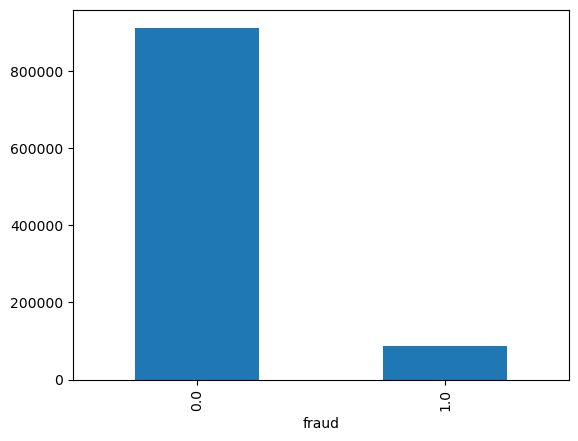

In [4]:
# Visuals
fraud_dist.plot(kind="bar")
plt.show()

In [5]:
# Training LogisticRegression

# Prepare the data for training
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
# Evaluation
log_reg.score(X_test, y_test)

0.9582

In [7]:
# Classification Report
pred = log_reg.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228210
         1.0       0.89      0.59      0.71     21790

    accuracy                           0.96    250000
   macro avg       0.93      0.79      0.84    250000
weighted avg       0.96      0.96      0.95    250000



In [8]:
# Running Oversample and balancing data
train = pd.DataFrame(X_train, columns = X_train.columns)

train["fraud"] = y_train.values

fraud_data = train[train["fraud"] == 1]
no_fraud_data = train[train["fraud"] == 0]

oversampled = resample(fraud_data, 
                        replace=True, 
                        n_samples = len(no_fraud_data),
                        random_state=0)

fraud_data_over = pd.concat([oversampled, no_fraud_data])

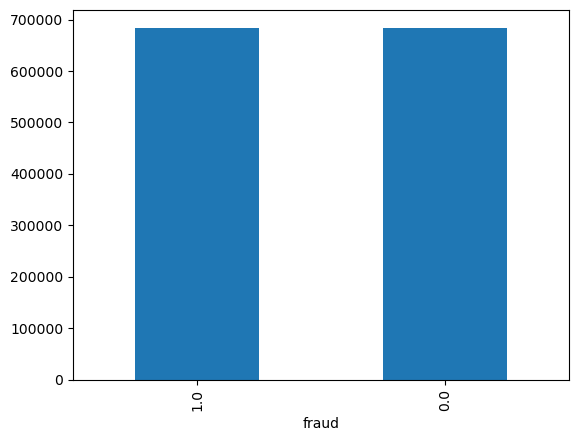

In [9]:
fraud_plt = fraud_data_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [10]:
# Training
X_train_over = fraud_data_over.drop(columns = ["fraud"])
y_train_over = fraud_data_over["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Evaluation
pred = log_reg.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    228210
         1.0       0.59      0.95      0.73     21790

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.85    250000
weighted avg       0.96      0.94      0.94    250000



The new model has better precision overall and a better accuracy. Just a better, more balanced evaluation overall.

In [12]:
# Running Undersample and balancing data
undersampled = resample(no_fraud_data, 
                        replace=True, 
                        n_samples = len(fraud_data),
                        random_state=0)

fraud_data_under = pd.concat([undersampled, fraud_data])

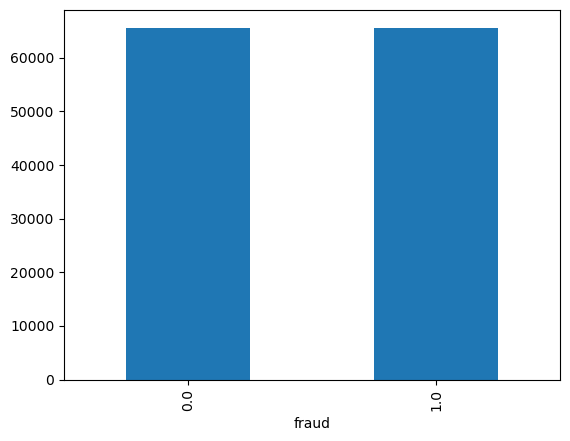

In [13]:
fraud_plt = fraud_data_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [14]:
# Training
X_train_under = fraud_data_under.drop(columns = ["fraud"])
y_train_under = fraud_data_under["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Evaluation
pred = log_reg.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    228210
         1.0       0.59      0.95      0.73     21790

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.85    250000
weighted avg       0.96      0.94      0.94    250000



In [16]:
# SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [17]:
# Evaluation
pred = log_reg.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228210
         1.0       0.58      0.95      0.72     21790

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.94      0.94    250000

